In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from __future__ import print_function
from numpy import *
from scipy import *
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import scipy as sp


import seawater
import datetime as dt
""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('seaborn-whitegrid')
import netCDF4 as nc

import cmocean as cm
import glob
import sys
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/CCCmaDEV/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
from matplotlib import reload
import arrow
import gsw
%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Question:

If we change the atmospheric concentration of CO2 from 280 umol to ~400 umol, what are the effects on the salish sea system? 


### Subquestions:

    1. Does the system as a whole store more carbon?
    2. Does the surface ocean store more carbon?
    2a. Does the upper layer (top 50m?) store more carbon?
    3. How much of the carbon gets exported to the open ocean?
    4. How much gets taken up by phytoplankton? (black box)
        How to measure this? stronger drawdown?
    5. How much gets outgassed?
    
    
    BUDGET:
    
    DIC_strait = DIC_riv + CO2_flux + UPTAKE/REMIN + BOUNDARY_TRANSPORT_JDF + BOUNDARY_TRANSPORT_JS
    Needn't be steady-state
    
## Preliminary notes:

##### The influx of C through JS is MASSIVE! is this a function of the model 'tilt'? may not be a correct number, for several reasons
    
##### 4e10 extra mol C get sent to open ocean at JdF in BR case. 2.7e10 extra mol C get outgassed in PI case...

##### Are we spunup? difference between deep C (BR-PI) keeps increasing. BR year seems spunup - only small changes. 



    

In [4]:
BR_2015_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2015_1_fullyear.nc')
BR_2016_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2016_1_fullyear.nc')
BR_2015_2_nc = nc.Dataset('./massbal_to_nc/MASSBAL_BR_2015_2_fullyear.nc')
PI_2015_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_2015_1_fullyear.nc')
PI_2015_2_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_2015_2_fullyear.nc')
PI_2015_3_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_2015_3_fullyear.nc')
PI_2016_1_nc = nc.Dataset('./massbal_to_nc/MASSBAL_PI_2016_1_fullyear.nc')


In [5]:
import numpy as np
w = np.random.rand(365,898,398)
w2 = np.mean(w, axis = 1)
w3 = np.mean(w2, axis = 1)
print(np.shape(w3))

(365,)


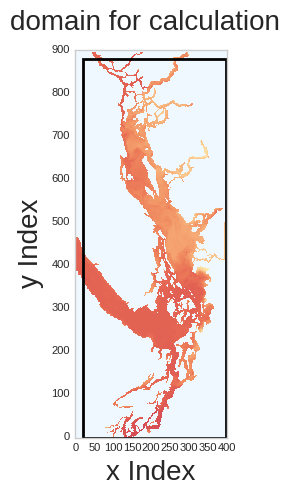

In [6]:
t_nc = nc.Dataset('/results2/SalishSea/nowcast-green.201806/01jan18/SalishSea_1h_20180101_20180101_grid_T.nc')
surfdat_1 = t_nc.variables['votemper'][0,0,:,:]

fig, ax = plt.subplots(1, 1, figsize=(5, 5), sharey=True)
cmap = cm.cm.matter
tplt = np.ma.masked_values(surfdat_1[:,:],0)
v_min = 2000
v_max = 2000

viz_tools.set_aspect(ax)
mesh = ax.pcolormesh(tplt, cmap=cm.cm.matter, vmin=0, vmax=20)

ax.set_xlabel('x Index', fontsize = 20 )
ax.set_ylabel('y Index', fontsize = 20 )

pat = patches.Rectangle((20,0),398-20,898-20,linewidth=2,edgecolor='k',facecolor='none')
ax.add_patch(pat)

plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
cmap.set_bad('aliceblue')
plt.suptitle('domain for calculation',fontsize=20)


In [7]:

stor_mol_PI_15_1 = PI_2015_1_nc['model_output']['stor_mol']
stor_mol_surf_PI_15_1 = PI_2015_1_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_15_1 = PI_2015_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_15_1 = PI_2015_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_15_1 = PI_2015_1_nc['model_output']['stor_mol_deep']
stor_flx_PI_15_1 = PI_2015_1_nc['model_output']['stor_flx']
stor_trans_JDF_PI_15_1 = PI_2015_1_nc['model_output']['stor_trans_JDF']

stor_mol_PI_15_2 = PI_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_PI_15_2 = PI_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_15_2 = PI_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_15_2 = PI_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_15_2 = PI_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_PI_15_2 = PI_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_PI_15_2 = PI_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_15_2 = PI_2015_2_nc['model_output']['stor_trans_JS']

stor_mol_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol']
stor_mol_surf_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_15_3 = PI_2015_3_nc['model_output']['stor_mol_deep']
stor_flx_PI_15_3 = PI_2015_3_nc['model_output']['stor_flx']
stor_trans_JDF_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_15_3 = PI_2015_3_nc['model_output']['stor_trans_JS']


stor_mol_BR_15_1 = BR_2015_1_nc['model_output']['stor_mol']
stor_mol_surf_BR_15_1 = BR_2015_1_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_15_1 = BR_2015_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_15_1 = BR_2015_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_15_1 = BR_2015_1_nc['model_output']['stor_mol_deep']
stor_flx_BR_15_1 = BR_2015_1_nc['model_output']['stor_flx']
stor_trans_JDF_BR_15_1 = BR_2015_1_nc['model_output']['stor_trans_JDF']

stor_mol_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol']
stor_mol_surf_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_15_2 = BR_2015_2_nc['model_output']['stor_mol_deep']
stor_flx_BR_15_2 = BR_2015_2_nc['model_output']['stor_flx']
stor_trans_JDF_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_15_2 = BR_2015_2_nc['model_output']['stor_trans_JS']

stor_mol_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol']
stor_mol_surf_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_surf']
stor_mol_20_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_BR_16_1 = BR_2016_1_nc['model_output']['stor_mol_deep']
stor_flx_BR_16_1 = BR_2016_1_nc['model_output']['stor_flx']
stor_trans_JDF_BR_16_1 = BR_2016_1_nc['model_output']['stor_trans_JDF']
stor_trans_JS_BR_16_1 = BR_2016_1_nc['model_output']['stor_trans_JS']

stor_mol_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol']
stor_mol_surf_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_surf']
stor_mol_20_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_20']
stor_mol_20_100_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_20_100']
stor_mol_deep_PI_16_1 = PI_2016_1_nc['model_output']['stor_mol_deep']
stor_flx_PI_16_1 = PI_2016_1_nc['model_output']['stor_flx']
stor_trans_JDF_PI_16_1 = PI_2016_1_nc['model_output']['stor_trans_JDF']
stor_trans_JS_PI_16_1 = PI_2016_1_nc['model_output']['stor_trans_JS']
days_in = np.arange(0,np.size(stor_mol_PI_15_1),1)

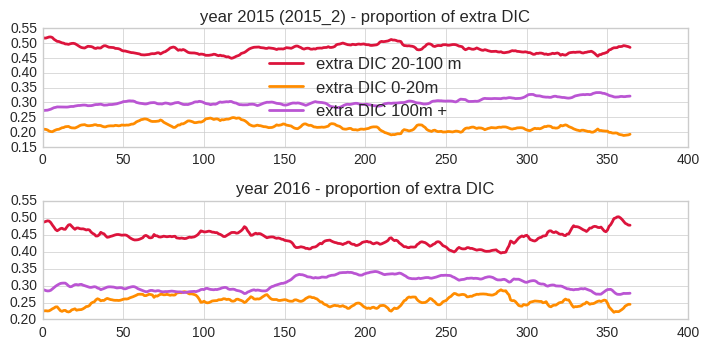

In [10]:
days_in = np.arange(0,np.size(stor_mol_PI_15_1),1)
days_in16 = np.arange(0,np.size(stor_mol_PI_15_1)+1,1)
totC_BR_15 = stor_mol_BR_15_2[:]
intC_BR_15 = stor_mol_20_100_BR_15_2[:]#/totC_BR_15
deepC_BR_15 = stor_mol_deep_BR_15_2[:]#/totC_BR_15
surfC_BR_15 = stor_mol_20_BR_15_2[:]#/totC_BR_15

totC_PI_15 = stor_mol_PI_15_3[:]
intC_PI_15 = stor_mol_20_100_PI_15_3[:]#/totC_PI_15
deepC_PI_15 = stor_mol_deep_PI_15_3[:]#/totC_PI_15
surfC_PI_15 = stor_mol_20_PI_15_3[:]#/totC_PI_15

totC_BR_16 = stor_mol_BR_16_1[0:365]
intC_BR_16 = stor_mol_20_100_BR_16_1[0:365]#/totC_BR_16
deepC_BR_16 = stor_mol_deep_BR_16_1[0:365]#/totC_BR_16
surfC_BR_16 = stor_mol_20_BR_16_1[0:365]#/totC_BR_16

totC_PI_16 = stor_mol_PI_16_1[0:365]
intC_PI_16 = stor_mol_20_100_PI_16_1[0:365]#/totC_PI_16
deepC_PI_16 = stor_mol_deep_PI_16_1[0:365]#/totC_PI_16
surfC_PI_16 = stor_mol_20_PI_16_1[0:365]#/totC_PI_16
# print(intC)
# print(deepC)
# print(surfC)
# print(totC)

diffC_15 = totC_BR_15 - totC_PI_15
diff_intC_15 = (intC_BR_15 -intC_PI_15)/diffC_15
diff_surfC_15 = (surfC_BR_15 -surfC_PI_15)/diffC_15
diff_deepC_15 = (deepC_BR_15 -deepC_PI_15)/diffC_15

diffC_16 = totC_BR_16 - totC_PI_16
diff_intC_16 = (intC_BR_16 -intC_PI_16)/diffC_16
diff_surfC_16 = (surfC_BR_16 -surfC_PI_16)/diffC_16
diff_deepC_16 = (deepC_BR_16 -deepC_PI_16)/diffC_16

fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(2,1,1)
ax.plot(days_in,diff_intC_15,color = 'crimson',label = 'extra DIC 20-100 m', linewidth = 2)
ax.plot(days_in,diff_surfC_15,color = 'darkorange',label = 'extra DIC 0-20m', linewidth = 2)
ax.plot(days_in,diff_deepC_15,color = 'mediumorchid',label = 'extra DIC 100m +', linewidth = 2)
ax.legend(loc = 'best')
ax.set_title('year 2015 (2015_2) - proportion of extra DIC')

ax = fig.add_subplot(2,1,2)
ax.set_title('year 2016 - proportion of extra DIC')
ax.plot(days_in,diff_intC_16,color = 'crimson',label = '2015 PI 1', linewidth = 2)
ax.plot(days_in,diff_surfC_16,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,diff_deepC_16,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
#ax.plot(days_in,stor_mol_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)
fig.tight_layout()

In [ ]:
np.size(stor_mol_BR_16_1)

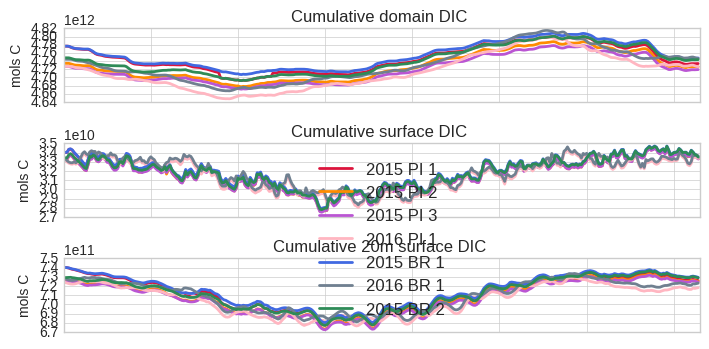

In [11]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_mol_PI_15_1,color = 'crimson',label = '2015 PI 1', linewidth = 2)
ax.plot(days_in,stor_mol_PI_15_2,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,stor_mol_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_mol_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)

ax.plot(days_in,stor_mol_BR_15_1,color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,stor_mol_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_mol_BR_15_2,color = 'seagreen',label = '2015 BR 2', linewidth = 2)
plt.xlim([0,365])
#ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_mol_surf_PI_15_1,color = 'crimson',label = '2015 PI 1', linewidth = 2)
ax.plot(days_in,stor_mol_surf_PI_15_2,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,stor_mol_surf_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_mol_surf_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)

ax.plot(days_in,stor_mol_surf_BR_15_1,color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,stor_mol_surf_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_mol_surf_BR_15_2,color = 'seagreen',label = '2015 BR 2', linewidth = 2)
#ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.xlim([0,365])
plt.title('Cumulative surface DIC ')

ax = fig.add_subplot(3,1,3)
ax.plot(days_in,stor_mol_20_PI_15_1,color = 'crimson',label = '2015 PI 1', linewidth = 2)
ax.plot(days_in,stor_mol_20_PI_15_2,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,stor_mol_20_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_mol_20_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)


ax.plot(days_in,stor_mol_20_BR_15_1,color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,stor_mol_20_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_mol_20_BR_15_2,color = 'seagreen',label = '2015 BR 2', linewidth = 2)
ax.legend(loc = 'best')
ax.set_ylabel('mols C')
plt.xlim([0,365])
ax.set_xticklabels([])
plt.title('Cumulative 20m surface DIC ')
 

plt.tight_layout()


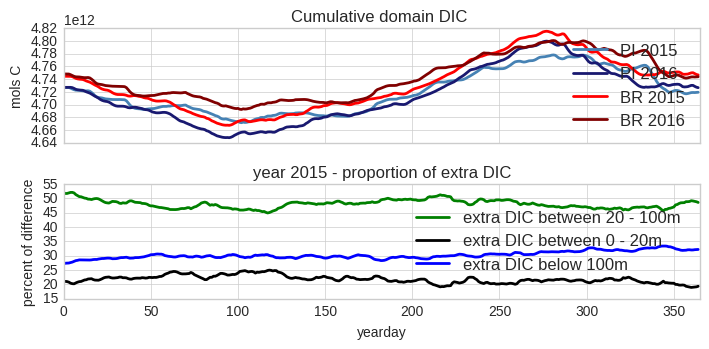

In [12]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(2,1,1)
ax.plot(days_in,stor_mol_PI_15_3,color = 'steelblue',label = 'PI 2015', linewidth = 2)
ax.plot(days_in,stor_mol_PI_16_1[0:365],color = 'midnightblue',label = 'PI 2016', linewidth = 2)
ax.plot(days_in,stor_mol_BR_16_1[0:365],color = 'red',label = 'BR 2015', linewidth = 2)
ax.plot(days_in,stor_mol_BR_15_2,color = 'maroon',label = 'BR 2016', linewidth = 2)
plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC ')

ax = fig.add_subplot(2,1,2)
#ax = fig.add_subplot(2,1,1)
ax.plot(days_in,diff_intC_15*100,color = 'g',label = 'extra DIC between 20 - 100m ', linewidth = 2)
ax.plot(days_in,diff_surfC_15*100,color = 'k',label = 'extra DIC between 0 - 20m ', linewidth = 2)
ax.plot(days_in,diff_deepC_15*100,color = 'b',label = 'extra DIC below 100m ', linewidth = 2)
ax.set_title('year 2015 - proportion of extra DIC')
ax.legend(loc = 'best')
#ax.set_xticklabels([])
ax.set_ylabel('percent of difference')
plt.xlim([0,365])
ax.set_xlabel('yearday')

plt.tight_layout()


In [41]:
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
vdir = grid['e2t'][0,0:878,20:398]
udir = grid['e1t'][0,0:878,20:398]
wdir = grid['e3t_0'][0,:,0:878,20:398]* t_mask[0,:,0:878,20:398]
t_mask = grid['tmask']
wdir_20 = grid['e3t_0'][0,0:20,0:878,20:398] * t_mask[0,0:20,0:878,20:398]
wdir_20_100 = grid['e3t_0'][0,20:27,0:878,20:398]* t_mask[0,20:27,0:878,20:398]
wdir_deep = grid['e3t_0'][0,27:40,0:878,20:398]* t_mask[0,27:40,0:878,20:398]
surfa = vdir*udir
size_domain = wdir *surfa 
size_domain_20 = wdir_20 *surfa
size_domain_20_100 = wdir_20_100 *surfa
size_domain_deep = wdir_deep *surfa

s_size_domain_20 = np.sum(np.sum(size_domain_20))
s_size_domain_20_100 = np.sum(np.sum(size_domain_20_100))
s_size_domain_deep = np.sum(np.sum(size_domain_deep))
s_size_domain = np.sum(np.sum(size_domain))

prop_d_20 = s_size_domain_20/s_size_domain
prop_d_20_100 = s_size_domain_20_100/s_size_domain
prop_d_deep = s_size_domain_deep/s_size_domain
print('d_surf')
print(prop_d_20)
print(np.mean(diff_surfC_15))
print('d_int')
print(prop_d_20_100)
print(np.mean(diff_intC_15))
print('d_deep')
print(prop_d_deep)
print(np.mean(diff_deepC_15))


d_surf
0.160983975833
0.217393
d_int
0.43540642416
0.480589
d_deep
0.403609600007
0.302017


In [36]:
t_mask = grid['tmask']
print(t_mask[0,0,250,250])

1


In [29]:
wdir_deep_0 = grid['e3t_0'][0,27:40,0,0]
print(wdir_deep_0)

[24.640731976147656 25.70331479283053 26.286849834306253 26.59728864969258
 26.75965336190128 26.843817035596075 26.88724213290768 26.909594066407376
 26.92108493428825 26.926988503279443 26.930020541517454 26.93157751738656
 26.932376968096264]


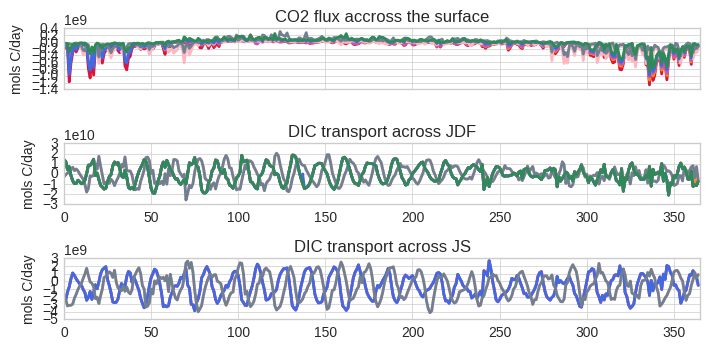

In [13]:
figstring = 'this'
fig = plt.figure(figsize=(10*0.72,5*0.72))

ax = fig.add_subplot(3,1,1)
ax.plot(days_in,stor_flx_PI_15_1,color = 'crimson',label = '2015 PI 1', linewidth = 2)
ax.plot(days_in,stor_flx_PI_15_2,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,stor_flx_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_flx_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)

ax.plot(days_in,stor_flx_BR_15_1,color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,stor_flx_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_flx_BR_15_2,color = 'seagreen',label = '2015 BR 2', linewidth = 2)
plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(3,1,2)
ax.plot(days_in,stor_trans_JDF_PI_15_1,color = 'crimson',label = '2015 PI 1', linewidth = 2)
ax.plot(days_in,stor_trans_JDF_PI_15_2,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,stor_trans_JDF_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_trans_JDF_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)


ax.plot(days_in,stor_trans_JDF_BR_15_1,color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,stor_trans_JDF_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_trans_JDF_BR_15_2,color = 'seagreen',label = '2015 BR 2', linewidth = 2)
plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(3,1,3)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.plot(days_in,stor_trans_JS_PI_15_2,color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,stor_trans_JS_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_trans_JS_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)

ax.plot(days_in,stor_trans_JS_BR_15_2,color = 'royalblue',label = '2015 BR 2', linewidth = 2)
ax.plot(days_in,stor_trans_JS_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JS')
plt.tight_layout()

In [14]:
print('2015 PI outgassing days', 365-np.size(np.where(stor_flx_PI_15_3[:] >0)))
print('2016 PI outgassing days', 366-np.size(np.where(stor_flx_PI_16_1[:] >0)))
print('2016 BR outgassing days', 366-np.size(np.where(stor_flx_BR_16_1[:] >0)))
print('2015 BR outgassing days', 365-np.size(np.where(stor_flx_BR_15_2[:] >0)))

2015 PI outgassing days 276
2016 PI outgassing days 273
2016 BR outgassing days 178
2015 BR outgassing days 177


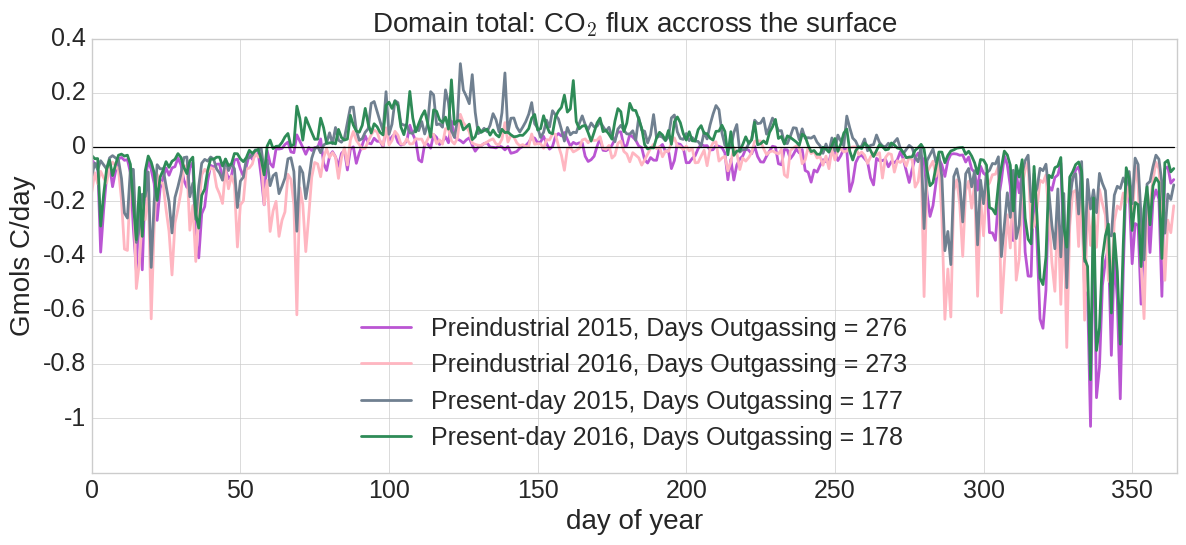

In [15]:
fig = plt.figure(figsize=(10*1.4,4*1.4))

 
ax = fig.add_subplot(1,1,1)

ax.plot(days_in,stor_flx_PI_15_3[:]/1e9,color = 'mediumorchid',label = 'Preindustrial 2015, Days Outgassing = 276', linewidth = 2)
ax.plot(days_in,stor_flx_PI_16_1[0:365]/1e9,color = 'lightpink',label = 'Preindustrial 2016, Days Outgassing = 273', linewidth = 2)
ax.plot(days_in,stor_flx_BR_16_1[0:365]/1e9,color = 'slategrey',label = 'Present-day 2015, Days Outgassing = 177', linewidth = 2)
ax.plot(days_in,stor_flx_BR_15_2[:]/1e9,color = 'seagreen',label = 'Present-day 2016, Days Outgassing = 178', linewidth = 2)
ax.plot(days_in, np.zeros_like(days_in), color = 'k', linewidth = 0.9)
plt.xlim([0,365])
ax.legend(loc = 'best', fontsize = 18)
xtl = np.arange(0,400,50)
ytl = [-1.2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4]
ax.set_ylim([-1.2,0.4])
ax.set_yticklabels(ytl, fontsize = 18)
ax.set_xticklabels(xtl, fontsize = 18)
ax.set_ylabel('Gmols C/day', fontsize = 20)
ax.set_xlabel('day of year', fontsize = 20)
plt.title('Domain total: CO$_2$ flux accross the surface', fontsize = 20)

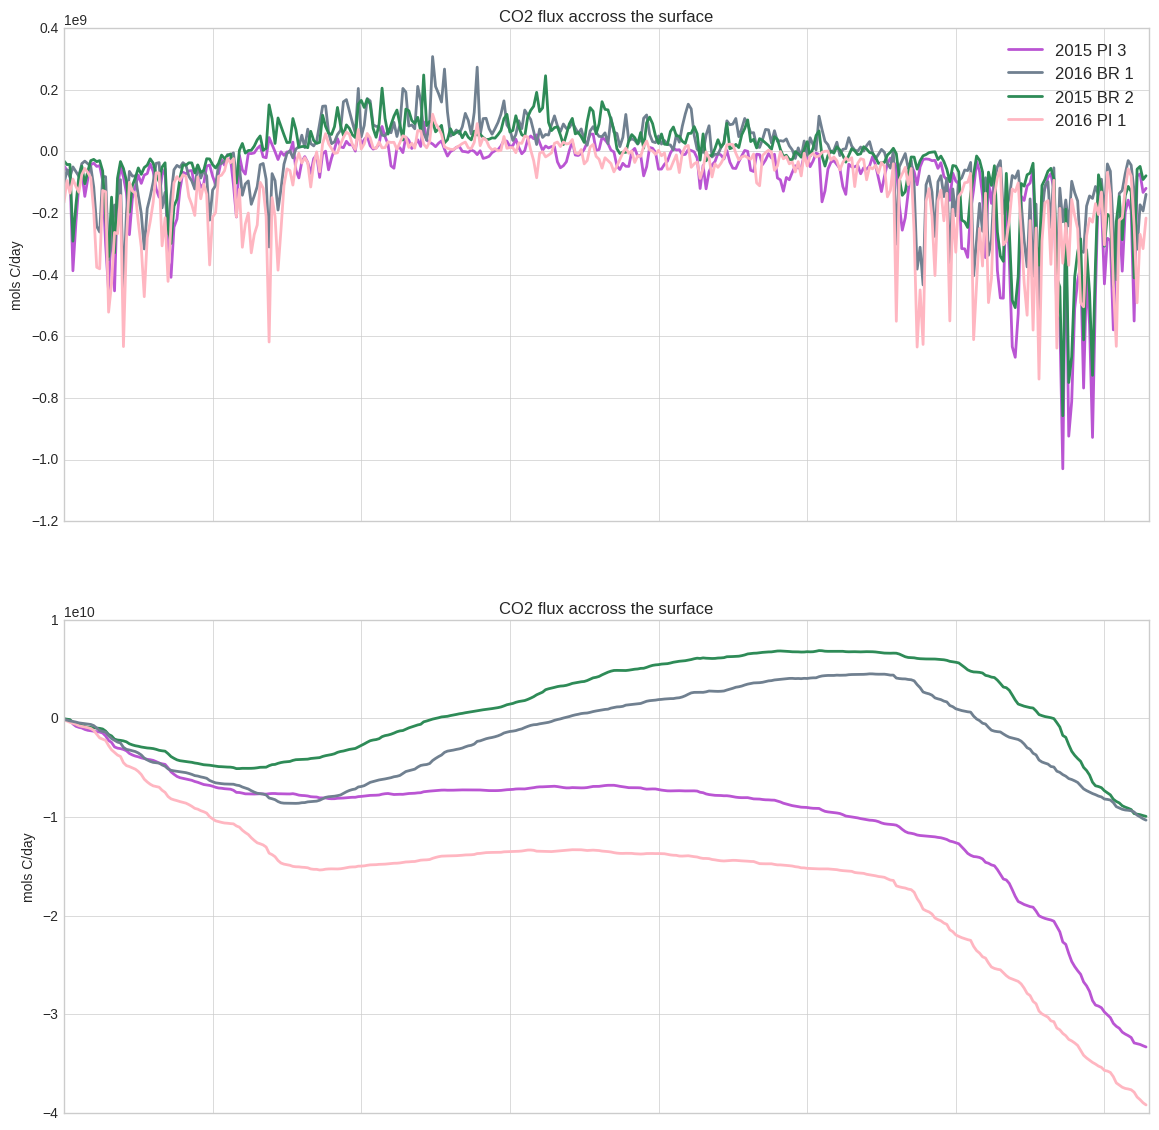

In [16]:
fig = plt.figure(figsize=(10*1.4,10*1.4))

 
ax = fig.add_subplot(2,1,1)

ax.plot(days_in,stor_flx_PI_15_3,color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,stor_flx_BR_16_1[0:365],color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,stor_flx_BR_15_2,color = 'seagreen',label = '2015 BR 2', linewidth = 2)
ax.plot(days_in,stor_flx_PI_16_1[0:365],color = 'lightpink',label = '2016 PI 1', linewidth = 2)

plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')



ax = fig.add_subplot(2,1,2)
ax.plot(days_in,np.cumsum(stor_flx_PI_15_3),color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_BR_15_2),color = 'seagreen',label = '2015 BR 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_PI_16_1[0:365]),color = 'lightpink',label = '2016 PI 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)

plt.xlim([0,365])
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

In [17]:
river_load15 = np.float32(1.6911e11)
river_load16 = np.float32(1.6795e11)

#PREINDUSTRIAL MASS BALANCES
EOY_PI2015_1 = np.sum(stor_mol_PI_15_1[np.size(stor_mol_PI_15_1)-1])
PI2015_1_change = (stor_mol_PI_15_1[np.size(stor_mol_PI_15_1)-1]-(stor_mol_PI_15_1[0]))
EOY_PI2015_2 = np.sum(stor_mol_PI_15_2[np.size(stor_mol_PI_15_2)-1])
PI2015_2_change = (stor_mol_PI_15_2[np.size(stor_mol_PI_15_2)-1]-(stor_mol_PI_15_2[0]))
EOY_PI2015_3 = np.sum(stor_mol_PI_15_3[np.size(stor_mol_PI_15_3)-1])
PI2015_3_change = (stor_mol_PI_15_3[np.size(stor_mol_PI_15_3)-1]-(stor_mol_PI_15_3[0]))
EOY_PI2016_1 = np.sum(stor_mol_PI_16_1[np.size(stor_mol_PI_16_1)-1])
PI2016_1_change = (stor_mol_PI_16_1[np.size(stor_mol_PI_16_1)-1]-(stor_mol_PI_16_1[0]))


FLUX_PI2015_1 = np.sum(stor_flx_PI_15_1)
FLUX_PI2015_2 = np.sum(stor_flx_PI_15_2)
FLUX_PI2015_3 = np.sum(stor_flx_PI_15_3)
FLUX_PI2016_1 = np.sum(stor_flx_PI_16_1)

JDFTRANS_PI2015_1 = np.sum(stor_trans_JDF_PI_15_1)
JDFTRANS_PI2015_2 = np.sum(stor_trans_JDF_PI_15_2)
JDFTRANS_PI2015_3 = np.sum(stor_trans_JDF_PI_15_3)
JDFTRANS_PI2016_1 = np.sum(stor_trans_JDF_PI_16_1)

#JSTRANS_PI2015_1 = np.sum(stor_trans_JS_PI_15_1)
JSTRANS_PI2015_2 = -np.sum(stor_trans_JS_PI_15_2)
JSTRANS_PI2015_3 = -np.sum(stor_trans_JS_PI_15_3)
JSTRANS_PI2016_1 = -np.sum(stor_trans_JS_PI_16_1)

blackbox_PI_15_1 = (PI2015_1_change - (FLUX_PI2015_1 + JDFTRANS_PI2015_1 + JSTRANS_PI2015_2 + river_load15))
blackbox_PI_15_2 = (PI2015_2_change - (FLUX_PI2015_2 + JDFTRANS_PI2015_2 + JSTRANS_PI2015_2 + river_load15))
blackbox_PI_15_3 = (PI2015_3_change - (FLUX_PI2015_3 + JDFTRANS_PI2015_3 + JSTRANS_PI2015_3 + river_load16))
blackbox_PI_16_1 = (PI2016_1_change - (FLUX_PI2016_1 + JDFTRANS_PI2016_1 + JSTRANS_PI2016_1 + river_load16))

##
EOY_BR2015_1 = np.sum(stor_mol_BR_15_1[np.size(stor_mol_BR_15_1)-1])
BR2015_1_change = (stor_mol_BR_15_1[np.size(stor_mol_BR_15_1)-1]-(stor_mol_BR_15_1[0]))
EOY_BR2015_2 = np.sum(stor_mol_BR_15_2[np.size(stor_mol_BR_15_2)-1])
BR2015_2_change = (stor_mol_BR_15_2[np.size(stor_mol_BR_15_2)-1]-(stor_mol_BR_15_2[0]))
EOY_BR2016_1 = np.sum(stor_mol_BR_16_1[np.size(stor_mol_BR_16_1)-1])
BR2016_1_change = (stor_mol_BR_16_1[np.size(stor_mol_BR_16_1)-1]-(stor_mol_BR_16_1[0]))

FLUX_BR2015_1 = np.sum(stor_flx_BR_15_1)
FLUX_BR2015_2 = np.sum(stor_flx_BR_15_2)
FLUX_BR2016_1 = np.sum(stor_flx_BR_16_1)

JDFTRANS_BR2015_1 = np.sum(stor_trans_JDF_BR_15_1)
JDFTRANS_BR2015_2 = np.sum(stor_trans_JDF_BR_15_2)
JDFTRANS_BR2016_1 = np.sum(stor_trans_JDF_BR_16_1)

#JSTRANS_BR2015_1 = np.sum(stor_trans_JS_BR_15_1)
JSTRANS_BR2015_2 = -np.sum(stor_trans_JS_BR_15_2)
JSTRANS_BR2016_1 = -np.sum(stor_trans_JS_BR_16_1)

blackbox_BR_15_1 = (BR2015_1_change - (FLUX_BR2015_1 + JDFTRANS_BR2015_1 + JSTRANS_BR2015_2 + river_load15))
blackbox_BR_15_2 = (BR2015_2_change - (FLUX_BR2015_2 + JDFTRANS_BR2015_2 + JSTRANS_BR2015_2 + river_load15))
blackbox_BR_16_1 = (BR2016_1_change - (FLUX_BR2016_1 + JDFTRANS_BR2016_1 + JSTRANS_BR2016_1 + river_load16))

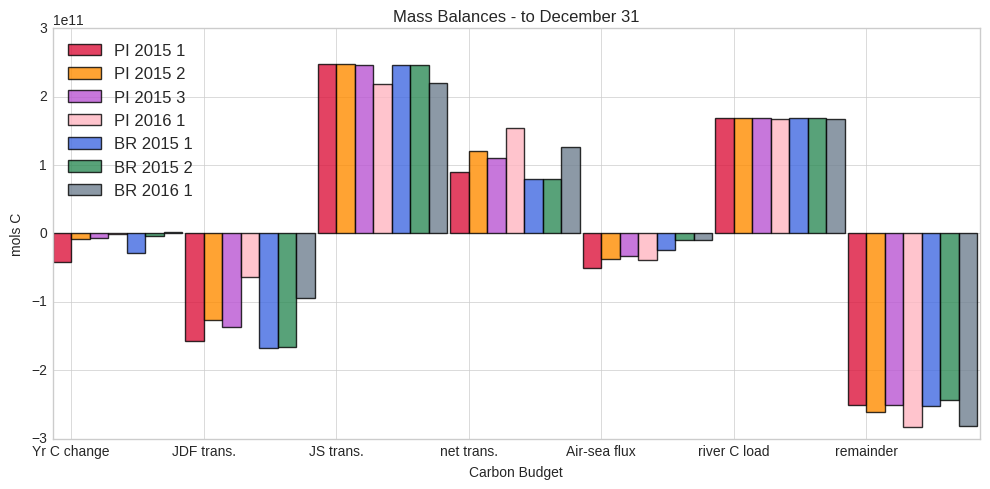

In [18]:
# data to plot
n_groups = 7
PI15_1_stats = (PI2015_1_change, JDFTRANS_PI2015_1, JSTRANS_PI2015_2, JSTRANS_PI2015_2 + JDFTRANS_PI2015_1,  FLUX_PI2015_1, river_load15, blackbox_PI_15_1)
PI15_2_stats = (PI2015_2_change, JDFTRANS_PI2015_2, JSTRANS_PI2015_2, JSTRANS_PI2015_2 + JDFTRANS_PI2015_2,  FLUX_PI2015_2, river_load15, blackbox_PI_15_2)
PI15_3_stats = (PI2015_3_change, JDFTRANS_PI2015_3, JSTRANS_PI2015_3, JSTRANS_PI2015_3 + JDFTRANS_PI2015_3,  FLUX_PI2015_3, river_load15, blackbox_PI_15_3)
PI16_1_stats = (PI2016_1_change, JDFTRANS_PI2016_1, JSTRANS_PI2016_1, JSTRANS_PI2016_1 + JDFTRANS_PI2016_1,  FLUX_PI2016_1, river_load16, blackbox_PI_16_1)
BR15_1_stats = (BR2015_1_change, JDFTRANS_BR2015_1, JSTRANS_BR2015_2, JSTRANS_BR2015_2 + JDFTRANS_BR2015_1,  FLUX_BR2015_1, river_load15, blackbox_BR_15_1)
BR15_2_stats = (BR2015_2_change, JDFTRANS_BR2015_2, JSTRANS_BR2015_2, JSTRANS_BR2015_2 + JDFTRANS_BR2015_2,  FLUX_BR2015_2, river_load15, blackbox_BR_15_2)
BR16_1_stats = (BR2016_1_change, JDFTRANS_BR2016_1, JSTRANS_BR2016_1, JSTRANS_BR2016_1 + JDFTRANS_BR2016_1,  FLUX_BR2016_1, river_load16, blackbox_BR_16_1)

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8

rects1 = plt.bar(index, PI15_1_stats, bar_width,
alpha=opacity,
color='crimson',
label='PI 2015 1')

rects2 = plt.bar(index + bar_width, PI15_2_stats, bar_width,
alpha=opacity,
color='darkorange',
label='PI 2015 2')

rects3 = plt.bar(index + bar_width*2, PI15_3_stats, bar_width,
alpha=opacity,
color='mediumorchid',
label='PI 2015 3')

rects4 = plt.bar(index + bar_width*3, PI16_1_stats, bar_width,
alpha=opacity,
color='lightpink',
label='PI 2016 1')

rects4 = plt.bar(index + bar_width*4, BR15_1_stats, bar_width,
alpha=opacity,
color='royalblue',
label='BR 2015 1')

rects5 = plt.bar(index + bar_width*5, BR15_2_stats, bar_width,
alpha=opacity,
color='seagreen',
label='BR 2015 2')

rects6 = plt.bar(index + bar_width*6, BR16_1_stats, bar_width,
alpha=opacity,
color='slategrey',
label='BR 2016 1')



plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('Yr C change', 'JDF trans.', 'JS trans.', 'net trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

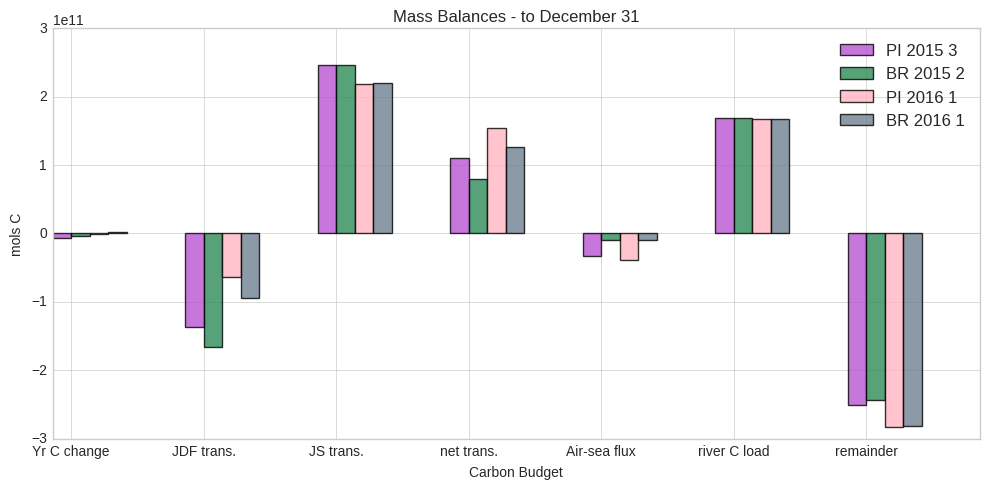

In [19]:
# data to plot
n_groups = 7
PI15_1_stats = (PI2015_1_change, JDFTRANS_PI2015_1, JSTRANS_PI2015_2, JSTRANS_PI2015_2 + JDFTRANS_PI2015_1,  FLUX_PI2015_1, river_load15, blackbox_PI_15_1)
PI15_2_stats = (PI2015_2_change, JDFTRANS_PI2015_2, JSTRANS_PI2015_2, JSTRANS_PI2015_2 + JDFTRANS_PI2015_2,  FLUX_PI2015_2, river_load15, blackbox_PI_15_2)
PI15_3_stats = (PI2015_3_change, JDFTRANS_PI2015_3, JSTRANS_PI2015_3, JSTRANS_PI2015_3 + JDFTRANS_PI2015_3,  FLUX_PI2015_3, river_load15, blackbox_PI_15_3)
PI16_1_stats = (PI2016_1_change, JDFTRANS_PI2016_1, JSTRANS_PI2016_1, JSTRANS_PI2016_1 + JDFTRANS_PI2016_1,  FLUX_PI2016_1, river_load16, blackbox_PI_16_1)
BR15_1_stats = (BR2015_1_change, JDFTRANS_BR2015_1, JSTRANS_BR2015_2, JSTRANS_BR2015_2 + JDFTRANS_BR2015_1,  FLUX_BR2015_1, river_load15, blackbox_BR_15_1)
BR15_2_stats = (BR2015_2_change, JDFTRANS_BR2015_2, JSTRANS_BR2015_2, JSTRANS_BR2015_2 + JDFTRANS_BR2015_2,  FLUX_BR2015_2, river_load15, blackbox_BR_15_2)
BR16_1_stats = (BR2016_1_change, JDFTRANS_BR2016_1, JSTRANS_BR2016_1, JSTRANS_BR2016_1 + JDFTRANS_BR2016_1,  FLUX_BR2016_1, river_load16, blackbox_BR_16_1)

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8

rects3 = plt.bar(index + bar_width*0, PI15_3_stats, bar_width,
alpha=opacity,
color='mediumorchid',
label='PI 2015 3')

rects5 = plt.bar(index + bar_width*1, BR15_2_stats, bar_width,
alpha=opacity,
color='seagreen',
label='BR 2015 2')

rects4 = plt.bar(index + bar_width*2, PI16_1_stats, bar_width,
alpha=opacity,
color='lightpink',
label='PI 2016 1')


rects6 = plt.bar(index + bar_width*3, BR16_1_stats, bar_width,
alpha=opacity,
color='slategrey',
label='BR 2016 1')



plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Mass Balances - to December 31')
plt.xticks(index + bar_width, ('Yr C change', 'JDF trans.', 'JS trans.', 'net trans.', 'Air-sea flux', 'river C load', 'remainder'))
plt.legend(loc = 'best')

plt.tight_layout()
plt.show()

In [20]:
print('JDF transport differences')
print('extra JDF transport out in 2015 (BR-PI)', JDFTRANS_BR2015_2 - JDFTRANS_PI2015_3)
print('extra JDF transport out in 2016 (BR-PI)', JDFTRANS_BR2016_1 - JDFTRANS_PI2016_1)
print('extra air-sea flux transport')
print('extra air-sea transport out in 2015 (BR-PI)', FLUX_BR2015_2 - FLUX_PI2015_3)
print('extra air-sea transport out in 2016 (BR-PI)', FLUX_BR2016_1 - FLUX_PI2016_1)
print('JS transport differences')
print('extra JS transport out in 2015 (BR-PI)', JSTRANS_BR2015_2 - JSTRANS_PI2015_3)
print('extra JS transport out in 2016 (BR-PI)', JSTRANS_BR2016_1 - JSTRANS_PI2016_1)
print('remainder differences')
print('black box 2015 (BR-PI)', blackbox_BR_15_2 - blackbox_PI_15_3)
print('black box 2016 (BR-PI)', blackbox_BR_16_1 - blackbox_PI_16_1)

JDF transport differences
extra JDF transport out in 2015 (BR-PI) -2.97593e+10
extra JDF transport out in 2016 (BR-PI) -3.00565e+10
extra air-sea flux transport
extra air-sea transport out in 2015 (BR-PI) 2.33783e+10
extra air-sea transport out in 2016 (BR-PI) 2.89078e+10
JS transport differences
extra JS transport out in 2015 (BR-PI) -1.78815e+08
extra JS transport out in 2016 (BR-PI) 1.37318e+09
remainder differences
black box 2015 (BR-PI) 8.44069e+09
black box 2016 (BR-PI) 2.33039e+09


In [21]:
JDF_BRminusPI_15 =  JDFTRANS_BR2015_2 - JDFTRANS_PI2015_3
JDF_BRminusPI_16 =  JDFTRANS_BR2016_1 - JDFTRANS_PI2016_1

airsea_BRminusPI_15 =  FLUX_BR2015_2 - FLUX_PI2015_3
airsea_BRminusPI_16 =  FLUX_BR2016_1 - FLUX_PI2016_1

JS_BRminusPI_15 =  JSTRANS_BR2015_2 - JSTRANS_PI2015_3
JS_BRminusPI_16 =  JSTRANS_BR2016_1 - JSTRANS_PI2016_1

BB_BRminusPI_15 =  blackbox_BR_15_2 - blackbox_PI_15_3
BB_BRminusPI_16 =  blackbox_BR_16_1 - blackbox_PI_16_1

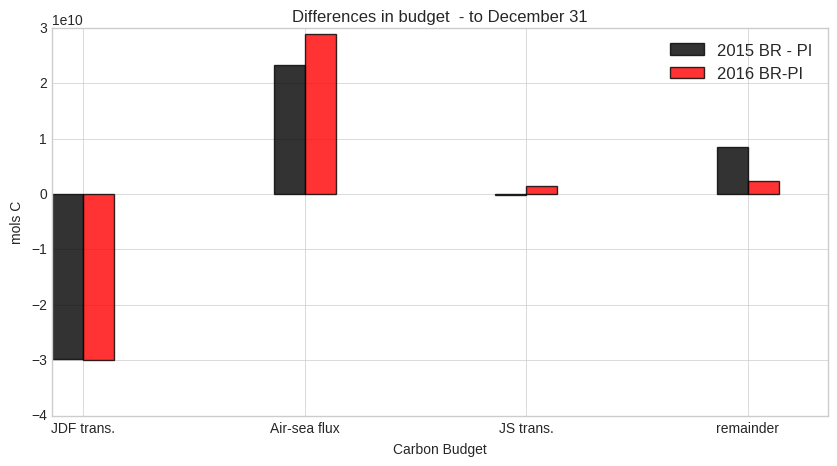

In [22]:
n_groups = 4
PI15_1_stats = (JDF_BRminusPI_15, airsea_BRminusPI_15, JS_BRminusPI_15, BB_BRminusPI_15)
PI16_1_stats = (JDF_BRminusPI_16, airsea_BRminusPI_16, JS_BRminusPI_16, BB_BRminusPI_16)

# create plot
fig, ax = plt.subplots(figsize=(10, 5))
index = np.arange(n_groups)
bar_width = 0.14
opacity = 0.8

rects3 = plt.bar(index + bar_width*0, PI15_1_stats, bar_width,
alpha=opacity,
color='k',
label='2015 BR - PI')

rects3 = plt.bar(index + bar_width*1, PI16_1_stats, bar_width,
alpha=opacity,
color='r',
label='2016 BR-PI')

plt.xlabel('Carbon Budget')
plt.ylabel('mols C')
plt.title('Differences in budget  - to December 31')
plt.xticks(index + bar_width, ('JDF trans.', 'Air-sea flux','JS trans.', 'remainder'))
plt.legend(loc = 'best')

## Cumulative mass-balances


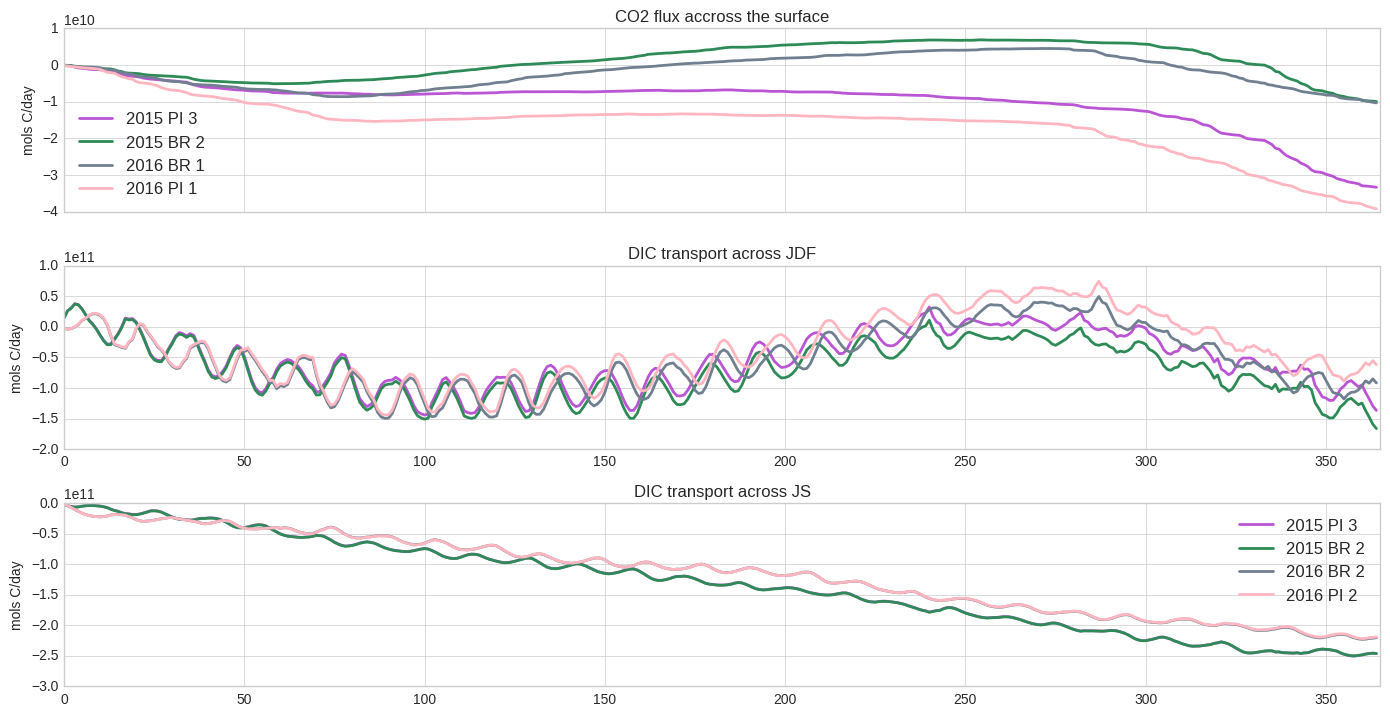

In [23]:
figstring = 'this'
fig = plt.figure(figsize=(10*1.4,10*1.4))

 
ax = fig.add_subplot(6,1,3)
#ax.plot(days_in,np.cumsum(stor_flx_PI_15_1),color = 'crimson',label = '2015 PI 1', linewidth = 2)
#ax.plot(days_in,np.cumsum(stor_flx_PI_15_2),color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_PI_15_3),color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
#ax.plot(days_in,np.cumsum(stor_flx_BR_15_1),color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_BR_15_2),color = 'seagreen',label = '2015 BR 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_flx_PI_16_1[0:365]),color = 'lightpink',label = '2016 PI 1', linewidth = 2)

plt.xlim([0,365])
ax.legend(loc = 'best')
ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('CO2 flux accross the surface')

ax = fig.add_subplot(6,1,4)
#ax.plot(days_in,np.cumsum(stor_trans_JDF_PI_15_1),color = 'crimson',label = '2015 PI 1', linewidth = 2)
#ax.plot(days_in,np.cumsum(stor_trans_JDF_PI_15_2),color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JDF_PI_15_3),color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
#ax.plot(days_in,np.cumsum(stor_trans_JDF_BR_15_1),color = 'royalblue',label = '2015 BR 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JDF_BR_15_2),color = 'seagreen',label = '2015 BR 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JDF_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 1', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JDF_PI_16_1[0:365]),color = 'lightpink',label = '2016 PI 1', linewidth = 2)

plt.xlim([0,365])
#ax.set_xticklabels([])
ax.set_ylabel('mols C/day')
plt.title('DIC transport across JDF')


ax = fig.add_subplot(6,1,5)

plt.xlim([0,365])
#ax.set_xticklabels([])
#ax.plot(days_in,np.cumsum(stor_trans_JS_PI_15_2),color = 'darkorange',label = '2015 PI 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JS_PI_15_3),color = 'mediumorchid',label = '2015 PI 3', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JS_BR_15_2),color = 'seagreen',label = '2015 BR 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JS_BR_16_1[0:365]),color = 'slategrey',label = '2016 BR 2', linewidth = 2)
ax.plot(days_in,np.cumsum(stor_trans_JS_PI_16_1[0:365]),color = 'lightpink',label = '2016 PI 2', linewidth = 2)

ax.set_ylabel('mols C/day')
ax.legend()
plt.title('DIC transport across JS')
plt.tight_layout()



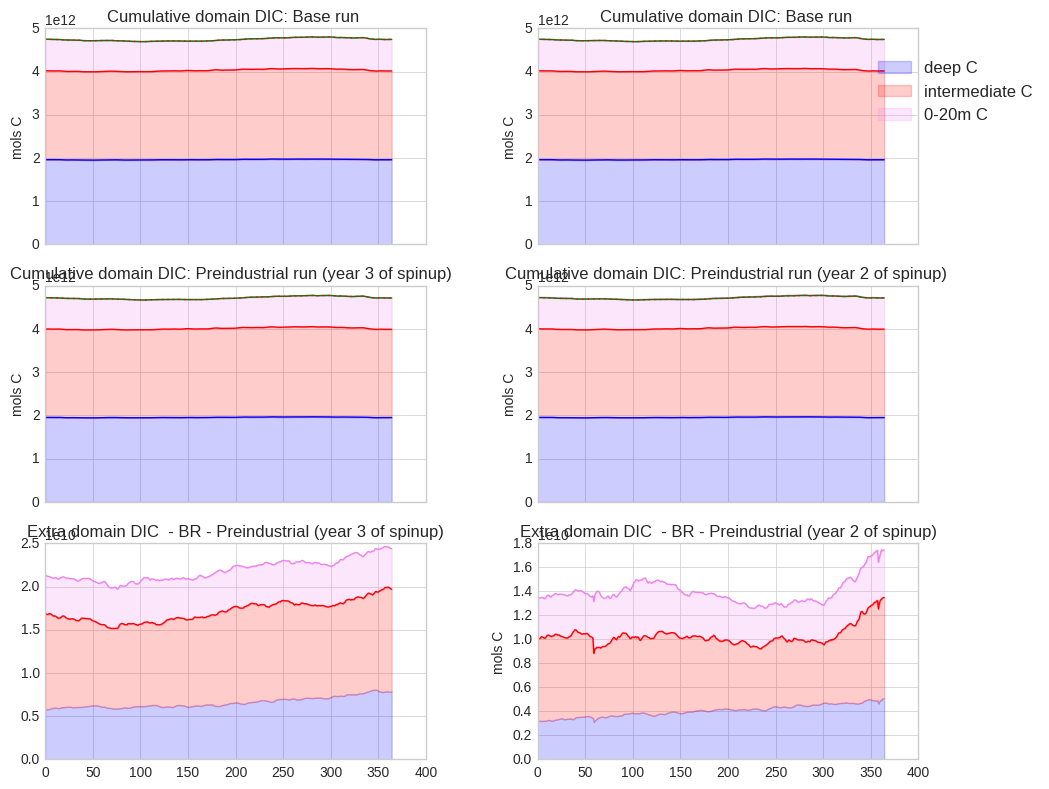

In [24]:
xs = np.arange(0,len(stor_mol_deep_BR_15_2),1)

c_deep_BR = stor_mol_deep_BR_15_2[:]
c_20_100_BR = stor_mol_20_100_BR_15_2[:]
c_0_20_BR = stor_mol_20_BR_15_2[:]
c_tot_BR = stor_mol_BR_15_2[:]
c_tot_fromsum_BR = c_deep_BR+c_20_100_BR+c_0_20_BR

c_deep_PI = stor_mol_deep_PI_15_3[:]
c_20_100_PI = stor_mol_20_100_PI_15_3[:]
c_0_20_PI = stor_mol_20_PI_15_3[:]
c_tot_PI = stor_mol_PI_15_3[:]
c_tot_fromsum_PI = c_deep_PI+c_20_100_PI+c_0_20_PI

c_deep_PI_2 = stor_mol_deep_PI_15_2[:]
c_20_100_PI_2 = stor_mol_20_100_PI_15_2[:]
c_0_20_PI_2 = stor_mol_20_PI_15_2[:]
c_tot_PI_2 = stor_mol_PI_15_2[:]
c_tot_fromsum_PI_2 = c_deep_PI_2+c_20_100_PI_2+c_0_20_PI_2

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(3,2,1)
ax.plot(xs,c_deep_BR)
ax.fill_between(xs,c_deep_BR,0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,c_deep_BR + c_20_100_BR, color = 'red' )
ax.fill_between(xs,c_deep_BR + c_20_100_BR,c_deep_BR, color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, c_deep_BR + c_20_100_BR + c_0_20_BR, color = 'violet')
ax.fill_between(xs,c_deep_BR + c_20_100_BR + c_0_20_BR,c_deep_BR + c_20_100_BR, color = 'violet',alpha = 0.2, label = '0-20m')
ax.plot(xs,c_tot_BR)
ax.plot(xs,c_tot_fromsum_BR, linestyle = ':')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC: Base run ')

ax = fig.add_subplot(3,2,2)
ax.plot(xs,c_deep_BR)
ax.fill_between(xs,c_deep_BR,0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,c_deep_BR + c_20_100_BR, color = 'red' )
ax.fill_between(xs,c_deep_BR + c_20_100_BR,c_deep_BR, color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, c_deep_BR + c_20_100_BR + c_0_20_BR, color = 'violet')
ax.fill_between(xs,c_deep_BR + c_20_100_BR + c_0_20_BR,c_deep_BR + c_20_100_BR, color = 'violet',alpha = 0.2, label = '0-20m')
ax.plot(xs,c_tot_BR)
ax.plot(xs,c_tot_fromsum_BR, linestyle = ':')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC: Base run ')

ax = fig.add_subplot(3,2,3)
ax.plot(xs,c_deep_PI)
ax.fill_between(xs,c_deep_PI,0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,c_deep_PI + c_20_100_PI, color = 'red' )
ax.fill_between(xs,c_deep_PI + c_20_100_PI,c_deep_PI, color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, c_deep_PI + c_20_100_PI + c_0_20_PI, color = 'violet')
ax.fill_between(xs,c_deep_PI + c_20_100_PI + c_0_20_PI,c_deep_PI + c_20_100_PI, color = 'violet',alpha = 0.2, label = '0-20m')
ax.plot(xs,c_tot_PI)
ax.plot(xs,c_tot_fromsum_PI, linestyle = ':')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC: Preindustrial run (year 3 of spinup)  ')

ax = fig.add_subplot(3,2,4)
ax.plot(xs,c_deep_PI)
ax.fill_between(xs,c_deep_PI_2,0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,c_deep_PI + c_20_100_PI_2, color = 'red' )
ax.fill_between(xs,c_deep_PI_2 + c_20_100_PI_2,c_deep_PI_2, color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, c_deep_PI_2 + c_20_100_PI_2 + c_0_20_PI_2, color = 'violet')
ax.fill_between(xs,c_deep_PI_2 + c_20_100_PI_2 + c_0_20_PI_2,c_deep_PI_2 + c_20_100_PI_2, color = 'violet',alpha = 0.2, label = '0-20m')
ax.plot(xs,c_tot_PI)
ax.plot(xs,c_tot_fromsum_PI, linestyle = ':')
ax.set_xticklabels([])
ax.set_ylabel('mols C')
plt.title('Cumulative domain DIC: Preindustrial run (year 2 of spinup) ')

ax = fig.add_subplot(3,2,5)

ax.fill_between(xs,(c_deep_BR- c_deep_PI),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_BR + c_20_100_BR) - (c_deep_PI + c_20_100_PI), color = 'red' )
ax.fill_between(xs,(c_deep_BR + c_20_100_BR)-(c_deep_PI + c_20_100_PI) ,(c_deep_BR-c_deep_PI) , color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, (c_deep_BR + c_20_100_BR + c_0_20_BR)-(c_deep_PI + c_20_100_PI + c_0_20_PI) , color = 'violet')
ax.fill_between(xs,(c_deep_BR + c_20_100_BR + c_0_20_BR)-(c_deep_PI + c_20_100_PI + c_0_20_PI) ,(c_deep_BR + c_20_100_BR) -(c_deep_PI + c_20_100_PI), color = 'violet',alpha = 0.2, label = '0-20m C')
plt.title('Extra domain DIC  - BR - Preindustrial (year 3 of spinup)')

ax = fig.add_subplot(3,2,6)

ax.fill_between(xs,(c_deep_BR- c_deep_PI_2),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_BR + c_20_100_BR) - (c_deep_PI_2 + c_20_100_PI_2), color = 'red' )
ax.fill_between(xs,(c_deep_BR + c_20_100_BR)-(c_deep_PI_2 + c_20_100_PI_2) ,(c_deep_BR-c_deep_PI_2) , color = 'red',alpha = 0.2, label = 'intermediate C')
ax.plot(xs, (c_deep_BR + c_20_100_BR + c_0_20_BR)-(c_deep_PI_2 + c_20_100_PI_2 + c_0_20_PI_2) , color = 'violet')
ax.fill_between(xs,(c_deep_BR + c_20_100_BR + c_0_20_BR)-(c_deep_PI_2 + c_20_100_PI_2 + c_0_20_PI_2) ,(c_deep_BR + c_20_100_BR) -(c_deep_PI_2 + c_20_100_PI_2), color = 'violet',alpha = 0.2, label = '0-20m C')
plt.title('Extra domain DIC  - BR - Preindustrial (year 2 of spinup)')

plt.legend(bbox_to_anchor=(0.34, 3.2, 1., .102))
ax.set_ylabel('mols C')
plt.tight_layout()

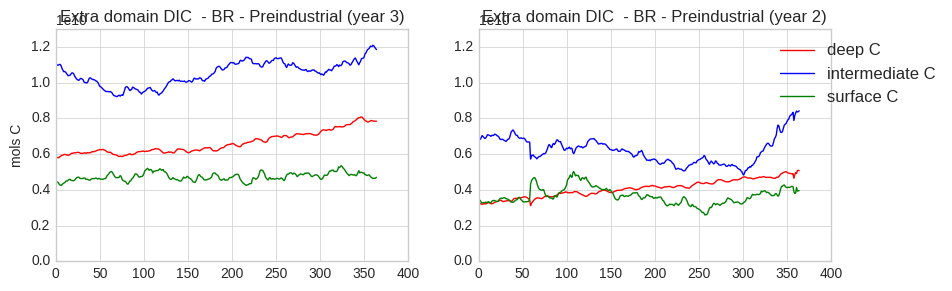

In [25]:
xs = np.arange(0,len(c_deep_PI),1)

fig = plt.figure(figsize=(10,3))

ax = fig.add_subplot(1,2,1)

#ax.fill_between(xs,(c_deep_BR- c_deep_PI),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_BR - c_deep_PI), color = 'red', label = 'deep C')
ax.plot(xs,(c_20_100_BR - c_20_100_PI), color = 'blue', label = 'intermediate C')
ax.plot(xs, (c_0_20_BR- c_0_20_PI) , color = 'green', label = 'surface C')
ax.set_ylim([0,1.3e10])


ax.set_ylabel('mols C')
plt.title('Extra domain DIC  - BR - Preindustrial (year 3)')

ax = fig.add_subplot(1,2,2)

#ax.fill_between(xs,(c_deep_BR- c_deep_PI),0,color = 'blue', alpha = 0.2, label = 'deep C')
ax.plot(xs,(c_deep_BR - c_deep_PI_2), color = 'red', label = 'deep C')
ax.plot(xs,(c_20_100_BR - c_20_100_PI_2), color = 'blue', label = 'intermediate C')
ax.plot(xs, (c_0_20_BR- c_0_20_PI_2) , color = 'green', label = 'surface C')
plt.title('Extra domain DIC  - BR - Preindustrial (year 2)')
ax.set_ylim([0,1.3e10])
plt.legend(bbox_to_anchor=(0.34, 0.9, 1., .102))


plt.legend(bbox_to_anchor=(0.34, 0.9, 1., .102))

In [26]:
print('end')

end
